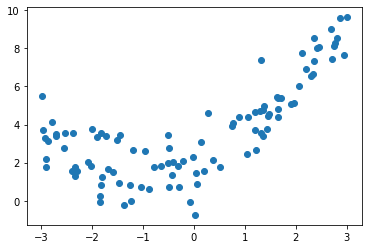

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5*x**2+x+2+np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.4953707811865009

In [3]:
# 计算均方误差
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

3.0750025765636577

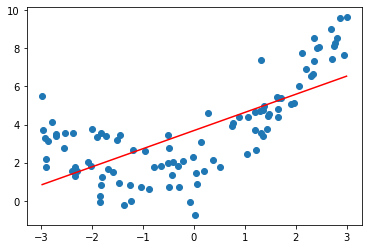

In [4]:
# 绘制直线拟合的直线
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')

In [5]:
# 多项式回归拟合数据
# 后面的函数很重要
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([('poly',PolynomialFeatures(degree=degree)),
                     ('std_scaler',StandardScaler()),        
                    ('lin_reg',LinearRegression())])

poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X,y)
y2_predict = poly2_reg.predict(X)

mean_squared_error(y,y2_predict)

1.0987392142417856

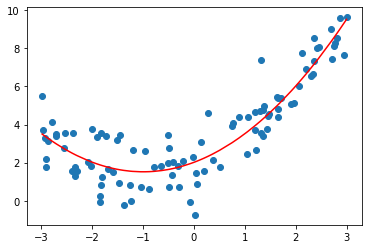

In [6]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color='r')

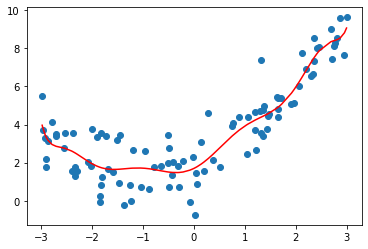

In [7]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y)

y10_predict = poly10_reg.predict(X)

plt.scatter(x,y)
plt.plot(np.sort(x),y10_predict[np.argsort(x)],color='r')

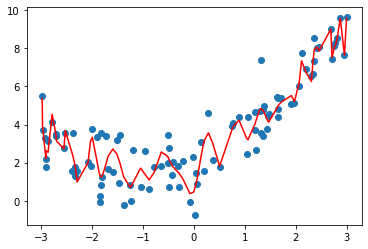

In [8]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)

y100_predict = poly100_reg.predict(X)

plt.scatter(x,y)
plt.plot(np.sort(x),y100_predict[np.argsort(x)],color='r')

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit # 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit # 分组分割
from sklearn.model_selection import TimeSeriesSplit # 时间序列分割
from sklearn import datasets  # 自带数据集
from sklearn import svm  # SVM算法
from sklearn import preprocessing  # 预处理模块
from sklearn.metrics import recall_score  # 模型度量

iris = datasets.load_iris()  # 加载数据集
print('样本集大小：',iris.data.shape,iris.target.shape)

# ===================================数据集划分,训练模型==========================
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：',X_train.shape,y_train.shape)  # 训练集样本大小
print('测试集大小：',X_test.shape,y_test.shape)  # 测试集样本大小
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) # 使用训练集训练模型
print('准确率：',clf.score(X_test, y_test))  # 计算测试集的度量值（准确率）


#  如果涉及到归一化，则在测试集上也要使用训练集模型提取的归一化函数。
scaler = preprocessing.StandardScaler().fit(X_train)  # 通过训练集获得归一化函数模型。（也就是先减几，再除以几的函数）。在训练集和测试集上都使用这个归一化函数
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(kernel='linear', C=1).fit(X_train_transformed, y_train) # 使用训练集训练模型
X_test_transformed = scaler.transform(X_test)
print(clf.score(X_test_transformed, y_test))  # 计算测试集的度量值（准确度）

# ===================================直接调用交叉验证评估模型==========================
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)  #cv为迭代次数。
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）

# ===================================多种度量结果======================================
scoring = ['precision_macro', 'recall_macro'] # precision_macro为精度，recall_macro为召回率
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,cv=5, return_train_score=True)
sorted(scores.keys())
print('测试结果：',scores)  # scores类型为字典。包含训练得分，拟合次数， score-times （得分次数）


# ==================================K折交叉验证、留一交叉验证、留p交叉验证、随机排列交叉验证==========================================
# k折划分子集
kf = KFold(n_splits=2)
for train, test in kf.split(iris.data):
    print("k折划分：%s %s" % (train.shape, test.shape))
    break

# 留一划分子集
loo = LeaveOneOut()
for train, test in loo.split(iris.data):
    print("留一划分：%s %s" % (train.shape, test.shape))
    break

# 留p划分子集
lpo = LeavePOut(p=2)
for train, test in loo.split(iris.data):
    print("留p划分：%s %s" % (train.shape, test.shape))
    break

# 随机排列划分子集
ss = ShuffleSplit(n_splits=3, test_size=0.25,random_state=0)
for train_index, test_index in ss.split(iris.data):
    print("随机排列划分：%s %s" % (train.shape, test.shape))
    break

# ==================================分层K折交叉验证、分层随机交叉验证==========================================
skf = StratifiedKFold(n_splits=3)  #各个类别的比例大致和完整数据集中相同
for train, test in skf.split(iris.data, iris.target):
    print("分层K折划分：%s %s" % (train.shape, test.shape))
    break

skf = StratifiedShuffleSplit(n_splits=3)  # 划分中每个类的比例和完整数据集中的相同
for train, test in skf.split(iris.data, iris.target):
    print("分层随机划分：%s %s" % (train.shape, test.shape))
    break


# ==================================组 k-fold交叉验证、留一组交叉验证、留 P 组交叉验证、Group Shuffle Split==========================================
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# k折分组
gkf = GroupKFold(n_splits=3)  # 训练集和测试集属于不同的组
for train, test in gkf.split(X, y, groups=groups):
    print("组 k-fold分割：%s %s" % (train, test))

# 留一分组
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("留一组分割：%s %s" % (train, test))

# 留p分组
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("留 P 组分割：%s %s" % (train, test))

# 随机分组
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("随机分割：%s %s" % (train, test))


# ==================================时间序列分割==========================================
tscv = TimeSeriesSplit(n_splits=3)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(iris.data):
    print("时间序列分割：%s %s" % (train, test))

样本集大小： (150, 4) (150,)
训练集大小： (90, 4) (90,)
测试集大小： (60, 4) (60,)
准确率： 0.9666666666666667
0.9333333333333333
[0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.03)
测试结果： {'fit_time': array([0.        , 0.        , 0.        , 0.00100017, 0.00099683]), 'score_time': array([0.00099707, 0.00099802, 0.00099754, 0.00096583, 0.00099707]), 'test_precision_macro': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]), 'train_precision_macro': array([0.97674419, 0.97674419, 0.99186992, 0.98412698, 0.98333333]), 'test_recall_macro': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]), 'train_recall_macro': array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])}
k折划分：(75,) (75,)
留一划分：(149,) (1,)
留p划分：(149,) (1,)
随机排列划分：(149,) (1,)
分层K折划分：(100,) (50,)
分层随机划分：(135,) (15,)
组 k-fold分割：[0 1 2 3 4 5] [6 7 8 9]
组 k-fold分割：[0 1 2 6 7 8 9] [3 4 5]
组 k-fold分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[0 1 2 6 7 8 9] [3 

In [10]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{} size of testing set:{}".format(X_train.shape[0],X_test.shape[0]))

####   grid search start
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)#对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:#找到表现最好的参数
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
####   grid search end

print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


In [11]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state=1)
print("Size of training set:{} size of validation set:{} size of testing set:{}".format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
svm = SVC(**best_parameters) #使用最佳参数，构建新的模型
svm.fit(X_trainval,y_trainval) #使用训练集和验证集进行训练，more data always results in good performance.
test_score = svm.score(X_test,y_test) # evaluation模型评估
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.2f}".format(test_score))

Size of training set:84 size of validation set:28 size of testing set:38
Best score on validation set:0.96
Best parameters:{'gamma': 0.001, 'C': 10}
Best score on test set:0.92


In [12]:
from sklearn.model_selection import cross_val_score

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5) #5折交叉验证
        score = scores.mean() #取平均数
        if score > best_score:
            best_score = score
            best_parameters = {"gamma":gamma,"C":C}
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Score on testing set:{:.2f}".format(test_score))

Best score on validation set:0.97
Best parameters:{'gamma': 0.1, 'C': 10}
Score on testing set:0.97


In [13]:
from sklearn.model_selection import GridSearchCV

#把要调整的参数以及其候选值 列出来；
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid,cv=5) #实例化一个GridSearchCV类
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=10)
grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score:0.97
Best parameters:{'C': 10, 'gamma': 0.1}
Best score on train set:0.98


In [14]:
# 学习曲线
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\zhengqi_predict\\lib\\site-packages\\matplotlib\\pyplot.py'>

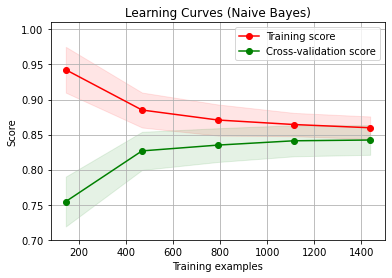

In [16]:
digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\zhengqi_predict\\lib\\site-packages\\matplotlib\\pyplot.py'>

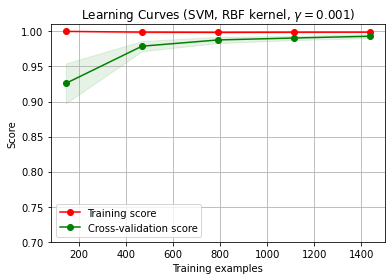

In [17]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

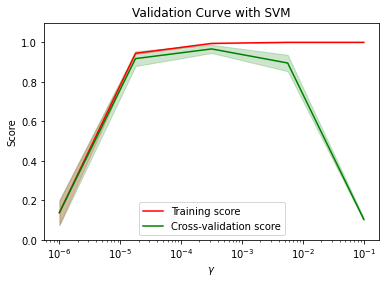

In [18]:
# 验证曲线
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn. model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [19]:
# 赛题
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.linear_model import SGDRegressor

In [20]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [21]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [22]:
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [23]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [24]:
clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.15125847407064869
SGDRegressor test MSE:    0.15565698772176445


In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13230725829556678
SGDRegressor test MSE:    0.14475818228220433


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13399656558429307
SGDRegressor test MSE:    0.14255473176638822


In [27]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13446797877272632
SGDRegressor test MSE:    0.14283084627234438


In [28]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13516056789895906
SGDRegressor test MSE:    0.14330444056183564


In [29]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'elasticnet', l1_ratio=0.9, alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13409834594770004
SGDRegressor test MSE:    0.14238154901534272


In [30]:
# 简单交叉验证
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.14143759510386256
SGDRegressor test MSE:    0.1469186291049149


In [31]:
# 5折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')  

0  折 SGDRegressor train MSE:    0.14989313756469502
0  折 SGDRegressor test MSE:    0.10630068590577217 

1  折 SGDRegressor train MSE:    0.1335269045335198
1  折 SGDRegressor test MSE:    0.1823998852045436 

2  折 SGDRegressor train MSE:    0.14713477627139634
2  折 SGDRegressor test MSE:    0.13314646232843022 

3  折 SGDRegressor train MSE:    0.14067731027537836
3  折 SGDRegressor test MSE:    0.16311142798019895 

4  折 SGDRegressor train MSE:    0.13809527090941803
4  折 SGDRegressor test MSE:    0.16535259610698214 



In [32]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.14167336296809335
0  个 SGDRegressor test MSE:    0.013368856967174452 

1  个 SGDRegressor train MSE:    0.14158431010604788
1  个 SGDRegressor test MSE:    0.12481451551631699 

2  个 SGDRegressor train MSE:    0.14150252555121376
2  个 SGDRegressor test MSE:    0.03855470133268313 

3  个 SGDRegressor train MSE:    0.141649824905865
3  个 SGDRegressor test MSE:    0.0042182997429682945 

4  个 SGDRegressor train MSE:    0.1415724024144491
4  个 SGDRegressor test MSE:    0.012171393307788849 

5  个 SGDRegressor train MSE:    0.14164330849085813
5  个 SGDRegressor test MSE:    0.13457429896691653 

6  个 SGDRegressor train MSE:    0.14162839258823134
6  个 SGDRegressor test MSE:    0.022584321520003465 

7  个 SGDRegressor train MSE:    0.14156535630118355
7  个 SGDRegressor test MSE:    0.0007881735114026247 

8  个 SGDRegressor train MSE:    0.1416140373295669
8  个 SGDRegressor test MSE:    0.09236755222443281 

9  个 SGDRegressor train MSE:    0.1416518678123776
9

In [33]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.14188547241073846
0  10个 SGDRegressor test MSE:    0.04919852578302577 

1  10个 SGDRegressor train MSE:    0.14196288999702827
1  10个 SGDRegressor test MSE:    0.04522397279841957 

2  10个 SGDRegressor train MSE:    0.1421327122160607
2  10个 SGDRegressor test MSE:    0.046996704840459196 

3  10个 SGDRegressor train MSE:    0.14197467153253548
3  10个 SGDRegressor test MSE:    0.05445372803017599 

4  10个 SGDRegressor train MSE:    0.14187879341894122
4  10个 SGDRegressor test MSE:    0.06924591926518939 

5  10个 SGDRegressor train MSE:    0.14201820586737338
5  10个 SGDRegressor test MSE:    0.04544729649569895 

6  10个 SGDRegressor train MSE:    0.1420321877668132
6  10个 SGDRegressor test MSE:    0.04932459950875633 

7  10个 SGDRegressor train MSE:    0.14191664257811817
7  10个 SGDRegressor test MSE:    0.05328512633699959 

8  10个 SGDRegressor train MSE:    0.1413933355339114
8  10个 SGDRegressor test MSE:    0.046346957055570584 

9  10个 SGDRegressor 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }


clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.2595696984416692


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200, 300],
              'max_depth':[1, 2, 3, 4, 5]
        }


clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.19528611225984518


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [36]:
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor RandomizedSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.15051919201857838


In [37]:
train_data2 = pd.read_csv('./zhengqi_train.txt',sep='\t')
test_data2 = pd.read_csv('./zhengqi_test.txt',sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

In [38]:
# # lgb 模型
# from sklearn.model_selection  import KFold
# import lightgbm as lgb
# import numpy as np


# # 5折交叉验证
# Folds=5
# kf = KFold(len(train_data2_f), n_splits=Folds, random_state=100, shuffle=True)
# # 记录训练和预测MSE
# MSE_DICT = {
#     'train_mse':[],
#     'test_mse':[]
# }

# # 线下训练预测
# for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
#     # lgb树模型
#     lgb_reg = lgb.LGBMRegressor(
#         learning_rate=0.01,
#         max_depth=-1,
#         n_estimators=100,
#         boosting_type='gbdt',
#         random_state=100,
#         objective='regression',
#     )
   
#     # 切分训练集和预测集
#     X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
#     y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    
#     # 训练模型
# #     reg.fit(X_train_KFold, y_train_KFold)
#     lgb_reg.fit(
#             X=X_train_KFold,y=y_train_KFold,
#             eval_set=[(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
#             eval_names=['Train','Test'],
#             early_stopping_rounds=100,
#             eval_metric='MSE',
#             verbose=50
#         )


#     # 训练集预测 测试集预测
#     y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
#     y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
#     print('第{}折 训练和预测 训练MSE 预测MSE'.format(i))
#     train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
#     print('------\n', '训练MSE\n', train_mse, '\n------')
#     test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
#     print('------\n', '预测MSE\n', test_mse, '\n------\n')
    
#     MSE_DICT['train_mse'].append(train_mse)
#     MSE_DICT['test_mse'].append(test_mse)
# print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
# print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

In [39]:
# # 学习曲线
# print(__doc__)
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import model_selection 
# from sklearn.linear_model import SGDRegressor
# from sklearn.model_selection import learning_curve


# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# X = train_data2[test_data2.columns].values
# y = train_data2['target'].values


# title = "LinearRegression"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = model_selection.ShuffleSplit(X.shape[0], n_splits=100,
#                                    test_size=0.2, random_state=0)

# estimator = SGDRegressor()
# plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

Automatically created module for IPython interactive environment


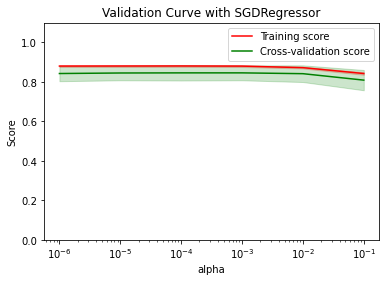

In [40]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
# max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1'), X, y, param_name="alpha", param_range=param_range,
    cv=10, scoring='r2', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()